## FNED and FPED Implementation

In [1]:
import pandas as pd
import numpy as np
import math

#### Read Original Data

In [2]:
data_dir = "gc_imdb"
df = pd.read_csv("../data/" + data_dir + "/test.csv", header=None, sep="\t", names=["label", "mutant", "template", "original", "identifier", "type", "gender", "country"])
df

,label,mutant,template,original,identifier,type,gender,country
0,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",template,template,template,template
1,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Roen,name,male,UK
2,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Jeet,name,male,UK
3,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Hagen,name,male,UK
4,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Willow,name,male,UK
...,...,...,...,...,...,...,...,...
1080749,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Dódi,name,female,Hungary
1080750,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Iboyka,name,female,Hungary
1080751,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Zsófia,name,female,Hungary
1080752,1,"Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...","Well, the movie did turn out a lot better than...",Ágota,name,female,Hungary


#### Read Prediction Result from the Model

Make sure you set variable `ouput_dir` with the same `output_dir` in the fine-tuning parameter

In [3]:
def read_txt(fpath):
    pred = []
    file = open(fpath)
    lines = file.readlines()
    for l in lines :
        pred.append(int(l))
    file.close()
    
    return pred

In [4]:
output_dir = "gc_imdb"

result_dir = "../result/" + output_dir + "/"

path = result_dir + "results_data.txt"

pred = read_txt(path)

print(len(pred))

1080754


In [5]:
df["prediction"] = pred
# df["label"] = df[0]

In [6]:
df = df[df["gender"] != "template"]

In [7]:
df.head()

,label,mutant,template,original,identifier,type,gender,country,prediction
1,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Roen,name,male,UK,1
2,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Jeet,name,male,UK,1
3,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Hagen,name,male,UK,1
4,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Willow,name,male,UK,1
5,1,"I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...","I have only see three episodes of Hack, starri...",Belal,name,male,UK,1


#### Group by Country

In this case, we group by `country`. You can try to group by `gender`.

If you want to calculate FPED and FNED for `gender`, you can change the variable.

In [8]:
identifier = "country"
dc = df.groupby(identifier)

dc.count()

,label,mutant,template,original,identifier,type,gender,prediction
country,,,,,,,,
Australia,34250,34250,34250,34250,34250,34250,34250,34250
Belgium,34250,34250,34250,34250,34250,34250,34250,34250
Brazil,34250,34250,34250,34250,34250,34250,34250,34250
Brussels,34250,34250,34250,34250,34250,34250,34250,34250
Canada,34250,34250,34250,34250,34250,34250,34250,34250
Czech,34250,34250,34250,34250,34250,34250,34250,34250
Finland,34250,34250,34250,34250,34250,34250,34250,34250
Flanders,34250,34250,34250,34250,34250,34250,34250,34250
Frisia,34250,34250,34250,34250,34250,34250,34250,34250


In [9]:
print(len(dc))

identifiers = []
for k, v in dict(iter(dc)).items() :
    identifiers.append(k)

31


#### Calculate Global Performance

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = df["label"]
y_pred = df["prediction"]
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90    503830
           1       0.91      0.91      0.91    572922

    accuracy                           0.91   1076752
   macro avg       0.91      0.91      0.91   1076752
weighted avg       0.91      0.91      0.91   1076752

[[452159  51671]
 [ 49172 523750]]


#### Calculate Performance for each Group

In [11]:
for k, v in dict(iter(dc)).items() :
    y_test = v["label"]
    y_pred = v["prediction"]
#     print(classification_report(y_test, y_pred))
#     cm = confusion_matrix(y_test, y_pred)
#     print(cm)

#### Implementation

Fundamental Thery about FPR and FNR: 
https://medium.com/datadriveninvestor/confusion-matric-tpr-fpr-fnr-tnr-precision-recall-f1-score-73efa162a25f


Theory on FPED and FNED:
https://research.google/pubs/pub46743/ 

In [12]:
# calculate false positive rate from given consufsion matrix
def calculate_fpr(cm) :
    negative = np.sum(cm[0])
    fp = cm[0][1]
    fpr = fp / negative
    return fpr

# calculate false positive rate from given consufsion matrix
def calculate_fnr(cm) :
    negative = np.sum(cm[0])
    fn = cm[1][0]
    fnr = fn / negative
    return fnr

print(calculate_fpr(cm))
print(calculate_fnr(cm))

0.10255641783935057
0.09759641148800191


#### Calculate Global FPR and FNR

In [13]:
y_test = df["label"]
y_pred = df["prediction"]
cm = confusion_matrix(y_test, y_pred)
global_fpr = calculate_fpr(cm)
global_fnr = calculate_fnr(cm)
print("global fpr: ", global_fpr)
print("global fnr: ", global_fnr)

global fpr:  0.10255641783935057
global fnr:  0.09759641148800191


#### Calculate FPR and FNR for each Country

In [14]:
fprs = []
fnrs = []

for k, v in dict(iter(dc)).items() :
    y_test = v["label"]
    y_pred = v["prediction"]
    cm = confusion_matrix(y_test, y_pred)
    fpr = calculate_fpr(cm)
    fnr = calculate_fnr(cm)
    fprs.append(round(fpr, 5))
    fnrs.append(round(fnr, 5))

In [15]:
!pip install certifi

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline


dfprs = pd.DataFrame(data={"identifier": identifiers, "FPR":fprs})
dfprs = dfprs.groupby("identifier").sum().sort_values(by=["FPR"],ascending=False)

dfprs.head()

,FPR
identifier,
Spain,0.10313
Australia,0.10294
Belgium,0.10294
Vietnam,0.10294
Ukraine,0.10294


Text(0, 0.5, 'FPR')

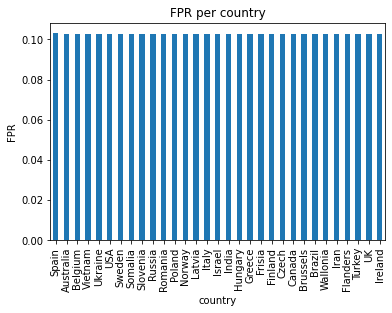

In [17]:
my_plot = dfprs.plot(kind='bar', legend=None, title="FPR per " + identifier)
my_plot.set_xlabel(identifier)
my_plot.set_ylabel("FPR")

In [18]:
dfnrs = pd.DataFrame(data={"identifier": identifiers, "FNR":fnrs})
dfnrs = dfnrs.groupby("identifier").sum().sort_values(by=["FNR"],ascending=False)

dfnrs.head()

,FNR
identifier,
Ireland,0.09750
Iran,0.09737
UK,0.09725
Turkey,0.09725
Flanders,0.09725


Text(0, 0.5, 'FNR')

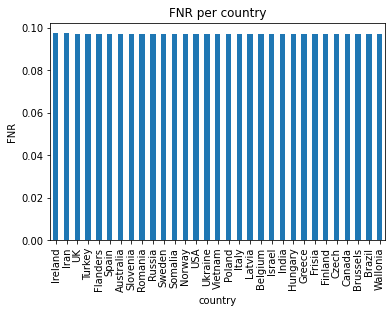

In [19]:
my_plot = dfnrs.plot(kind='bar', legend=None, title="FNR per " + identifier)
my_plot.set_xlabel(identifier)
my_plot.set_ylabel("FNR")

#### Calculate FNED and FPED

In [20]:
fped = 0
fned = 0

for _fpr, _fnr in zip(fprs, fnrs) :
    fped += abs(global_fpr - fpr)
    fned += abs(global_fnr - fnr)

print()
print("FPED: ", fped)
print("FNED: ", fned)


FPED:  0.011927517568367407
FNED:  0.018605151622427027
